In [4]:
!uv pip install python-dotenv langchain-openai

Audited 2 packages in 25ms


In [6]:
from dotenv import load_dotenv

load_dotenv()

True

In [7]:
from langchain_openai import ChatOpenAI

query = "안녕 만나서 반가워 백엔드 개발자가 Ai Agent 개발자로 커리어를 전환하고 싶어 조언을 구해줘"

llm = ChatOpenAI()

llm.invoke(query)



AIMessage(content='안녕하세요! 백엔드 개발자에서 AI Agent 개발자로 전환하고 싶으시군요. 그런 결정을 내리기 전에 몇 가지 고려해야 할 사항이 있습니다.\n\n먼저, AI Agent 개발자가 되기 위해서는 AI 및 머신러닝에 대한 깊은 이해와 경험이 필요합니다. 이를 위해 관련된 학습 및 교육을 통해 필요한 지식과 기술을 습득하는 것이 중요합니다. 온라인 강의나 교육 프로그램을 통해 AI 및 머신러닝에 대한 기초를 다지는 것부터 시작해보세요.\n\n또한, 프로젝트나 경험을 통해 실무적인 능력을 키우는 것도 중요합니다. AI Agent 개발자로서의 경력을 쌓기 위해 관련된 프로젝트에 참여하거나 개인 프로젝트를 진행해보는 것을 추천합니다.\n\n또한, AI 및 머신러닝 분야는 빠르게 변화하는 기술 분야이기 때문에 지속적인 학습과 연구가 필요합니다. 관련 논문을 읽거나 최신 기술 동향을 파악하는 것도 중요합니다.\n\n마지막으로, AI Agent 개발자로의 전환은 시간과 노력이 필요한 과정이므로 인내심을 가지고 꾸준히 노력하며 성장해나가는 것이 중요합니다.\n\n이러한 과정을 거쳐 백엔드 개발자에서 AI Agent 개발자로의 전환을 성공적으로 이뤄낼 수 있을 것입니다. 행운을 빕니다!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 520, 'prompt_tokens': 55, 'total_tokens': 575, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turb

In [9]:
# state, node, edge, conditional edge
# state는 현재 agent의 상태
# node는 agent가 수행하는 작업 || 함수
# edge는 노드 사이의 연결 -> 실선
# conditional edge는 조건에 따라 다른 노드로 이동 -> 점선

!uv pip install langgraph

Audited 1 package in 2ms


In [11]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage

class AgentState(TypedDict):
    messages: list[Annotated[AnyMessage, add_messages]]
    

In [12]:
from langgraph.graph import StateGraph

graph_builder = StateGraph(AgentState)


In [14]:
def generate(state: AgentState) -> AgentState:
    messages = state["messages"]
    ai_message = llm.invoke(messages)
    return { 'messages' : [ai_message]}

In [15]:
from langgraph.graph import START, END

graph_builder.add_node("generate", generate)
graph_builder.add_edge(START, "generate")
graph_builder.add_edge("generate", END)


In [16]:
graph = graph_builder.compile()

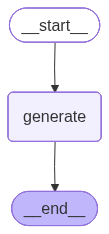

In [17]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
from langchain_core.messages import HumanMessage

initial_state = {"messages": [HumanMessage(query)]}

graph.invoke(initial_state)